In [1]:
import pandas as pd 
import glob
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score, LeaveOneOut
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
tg_2020 = pd.read_csv("tg_data/tg_2020.csv")
tg_2022 = pd.read_csv("tg_data/tg_2022.csv")
gt_2020 = pd.read_csv("gt_data/gt_2020.csv")
gt_2022 = pd.read_csv("gt_data/gt_2022.csv")
news_2020 = pd.read_csv("news_data/news_2020.csv")
news_2022 = pd.read_csv("news_data/news_2022.csv")  
def load_yt_data_by_year(year):
    csv_path = f"yt_data/yt_{year}/*.csv"
    csv_files = glob.glob(csv_path)
    dataframes = []
    for file in csv_files:
        df = pd.read_csv(file)
        df['source_file'] = os.path.basename(file)
        dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True)
yt_2020 = load_yt_data_by_year(2020)
yt_2022 = load_yt_data_by_year(2022)
off_2020 = pd.read_csv("official_data/stats_2020.csv")
off_2022 = pd.read_csv("official_data/stats_2022.csv")

In [3]:
tg_2020.head()

,state,dimension,count,percentage,total_posts
0,Guanajuato,INCOME,42,20.487805,205
1,Guanajuato,ACCESS TO HEALTH SERVICES,58,28.292683,205
2,Guanajuato,EDUCATIONAL_LAG,12,5.853659,205
3,Guanajuato,ACCESS TO SOCIAL SECURITY,56,27.317073,205
4,Guanajuato,HOUSING,11,5.365854,205


In [4]:
gt_2020.head()

,state,FOVISSSTE,PromoDescuentos,agua potable,apoyo Infonavit,banco de alimentos,becas,centro de salud,conflictos,crisis,...,tianguis,tiendeo,violencia,access_to_food,access_to_health_services,access_to_social_security,educational_lag,housing,income,social_cohesion
0,MX-AGU,5.08,1.00,1.33,3.42,0.00,27.08,4.00,26.92,24.75,...,0.83,0.00,9.50,0.92,12.75,35.88,15.75,3.28,16.08,19.42
1,MX-BCN,37.67,7.50,18.00,71.25,0.08,14.33,3.83,34.92,25.25,...,25.50,3.50,6.58,9.14,10.95,39.42,9.29,42.31,18.22,21.03
2,MX-BCS,34.67,0.75,11.75,13.83,0.00,6.83,0.92,3.75,2.92,...,1.00,0.00,2.67,0.88,3.50,5.66,3.83,20.08,1.72,3.06
3,MX-CAM,2.08,54.33,1.17,0.08,0.00,5.75,0.08,31.42,4.17,...,26.25,2.08,2.17,27.55,2.54,2.96,3.42,1.11,2.39,20.36
4,MX-CHP,10.42,5.25,2.67,0.42,0.08,7.42,0.25,16.25,7.67,...,4.67,0.25,2.58,2.56,3.21,8.17,4.25,4.50,4.44,10.75


In [5]:
yt_2020.head()

,state,dimension,avg_sentiment,mentions_count,videos_analyzed,comments_analyzed,source_file
0,Morelos,Income,-0.470799,6421,300,18689,morelos.csv
1,Morelos,Access To Health Services,-0.546264,2583,300,18689,morelos.csv
2,Morelos,Educational Lag,-0.290526,2850,300,18689,morelos.csv
3,Morelos,Access To Social Security,-0.388333,300,300,18689,morelos.csv
4,Morelos,Housing,-0.580216,1203,300,18689,morelos.csv


In [6]:
news_2020.head()

,Unnamed: 0,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7
0,Chiapas,0.049664,0.428592,0.050325,0.066440,0.168499,0.105813,0.068651,0.060388
1,Queretaro,0.219801,0.296963,0.051571,0.099180,0.111831,0.090218,0.040383,0.089356
2,Baja California Sur,0.038544,0.295954,0.274110,0.027095,0.112471,0.119586,0.074339,0.057354
3,Guanajuato,0.036158,0.331253,0.006775,0.050556,0.115823,0.317956,0.043033,0.097156
4,Hidalgo,0.026875,0.034518,0.042831,0.264087,0.097462,0.052220,0.449243,0.031114


In [7]:
off_2020.head()

,state,educational lag,access to health services,access to social security,housing1,housing2,income,access to food
0,Aguascalientes,15.7,20.2,36.0,4.0,2.1,38.7,18.2
1,Baja California,16.1,24.0,38.9,6.8,5.0,30.4,13.4
2,Baja California Sur,14.5,17.4,32.7,11.4,9.4,35.9,23.4
3,Campeche,19.2,21.0,54.9,13.5,33.4,57.7,26.1
4,Coahuila de Zaragoza,14.3,21.6,28.2,2.8,3.2,40.2,15.5


## 1. Combine housing1 and housing2 in the official statistics to create only one measure for this dimension and drop unnecessary columns

In [8]:
off_2020.columns = off_2020.columns.str.strip().str.replace(' ', '_')
off_2022.columns = off_2022.columns.str.strip().str.replace(' ', '_')

In [9]:
off_2020['housing'] = (off_2020['housing1'] + off_2020['housing2']) / 2
off_2022['housing'] = (off_2022['housing1'] + off_2022['housing2']) / 2

off_2020.drop(columns=['housing1', 'housing2'], inplace=True)
off_2022.drop(columns=['housing1', 'housing2'], inplace=True)

In [10]:
off_2020.head()

,state,educational_lag,access_to_health_services,access_to_social_security,income,access_to_food,housing
0,Aguascalientes,15.7,20.2,36.0,38.7,18.2,3.05
1,Baja California,16.1,24.0,38.9,30.4,13.4,5.90
2,Baja California Sur,14.5,17.4,32.7,35.9,23.4,10.40
3,Campeche,19.2,21.0,54.9,57.7,26.1,23.45
4,Coahuila de Zaragoza,14.3,21.6,28.2,40.2,15.5,3.00


In [11]:
off_2022.head()

,year,state,educational_lag,access_to_health_services,access_to_social_security,access_to_food,income,ext_pov,housing
0,2022,Aguascalientes,16.5,26.2,34.7,15.6,33.0,6.1,3.60
1,2022,Baja California,15.5,28.4,34.7,10.0,18.8,2.8,5.10
2,2022,Baja California Sur,14.2,17.3,29.9,14.5,17.9,2.8,9.25
3,2022,Campeche,20.3,34.6,54.7,22.0,51.0,15.9,24.90
4,2022,Coahuila de Zaragoza,13.5,19.7,24.4,13.2,28.8,5.9,3.40


In [12]:
off_2022.drop(columns=['ext_pov', 'year'], inplace=True)

In [13]:
off_2020.rename(columns={'educational_lag': 'educ_target', 'access_to_health_services': 'health_target', 
                         'access_to_social_security': 'social_target', 'access_to_food': 'food_target',
                          'income': 'income_target', 'housing': 'housing_target'}, inplace=True)

off_2022.rename(columns={'educational_lag': 'educ_target', 'access_to_health_services': 'health_target', 
                         'access_to_social_security': 'social_target', 'access_to_food': 'food_target',
                          'income': 'income_target', 'housing': 'housing_target'}, inplace=True)

In [14]:
off_2020.head()

,state,educ_target,health_target,social_target,income_target,food_target,housing_target
0,Aguascalientes,15.7,20.2,36.0,38.7,18.2,3.05
1,Baja California,16.1,24.0,38.9,30.4,13.4,5.90
2,Baja California Sur,14.5,17.4,32.7,35.9,23.4,10.40
3,Campeche,19.2,21.0,54.9,57.7,26.1,23.45
4,Coahuila de Zaragoza,14.3,21.6,28.2,40.2,15.5,3.00


## 2. Clean Google Trends data: remove queries that did not have any results and re-compute dimension's averages 

In [15]:
gt_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      32 non-null     object 
 1   FOVISSSTE                  32 non-null     float64
 2   PromoDescuentos            32 non-null     float64
 3   agua potable               32 non-null     float64
 4   apoyo Infonavit            32 non-null     float64
 5   banco de alimentos         32 non-null     float64
 6   becas                      32 non-null     float64
 7   centro de salud            32 non-null     float64
 8   conflictos                 32 non-null     float64
 9   crisis                     32 non-null     float64
 10  desempleo                  32 non-null     float64
 11  discriminación            32 non-null     float64
 12  enfermedad                 32 non-null     float64
 13  escuela secundaria         32 non-null     float64
 

In [16]:
POVERTY_DIMENSIONS = {
    'income': ['crisis', 'desempleo', 'pobreza'],
    'access_to_health_services': ['enfermedad', 'centro de salud'],
    'educational_lag': ['becas', 'escuela secundaria'],
    'access_to_social_security': ['pensiones', 'seguro social'],
    'access_to_food': ['banco de alimentos', 'tianguis', 'tiendeo', 'PromoDescuentos'],
    'housing': ['apoyo Infonavit', 'agua potable', 'FOVISSSTE'],
    'social_cohesion': ['violencia', 'conflictos', 'discriminación']}

In [17]:
# remove all columns exceot the state and poverty dimensions
gt_2020 = gt_2020[['state'] + list(POVERTY_DIMENSIONS.keys())]

gt_2022 = gt_2022[['state'] + list(POVERTY_DIMENSIONS.keys())]

In [18]:
# rename states with the full name 
state_map = {
    "MX-AGU": "Aguascalientes", "MX-BCN": "Baja California", "MX-BCS": "Baja California Sur",
    "MX-CAM": "Campeche", "MX-CHP": "Chiapas", "MX-CHH": "Chihuahua", "MX-COA": "Coahuila",
    "MX-COL": "Colima", "MX-DUR": "Durango", "MX-GUA": "Guanajuato", "MX-GRO": "Guerrero",
    "MX-HID": "Hidalgo", "MX-JAL": "Jalisco", "MX-DIF": "Ciudad de México", "MX-MIC": "Michoacán",
    "MX-MOR": "Morelos", "MX-NAY": "Nayarit", "MX-NLE": "Nuevo León", "MX-OAX": "Oaxaca",
    "MX-PUE": "Puebla", "MX-QUE": "Querétaro", "MX-ROO": "Quintana Roo", "MX-SLP": "San Luis Potosí",
    "MX-SIN": "Sinaloa", "MX-SON": "Sonora", "MX-MEX": "Estado de México", "MX-TAB": "Tabasco",
    "MX-TAM": "Tamaulipas", "MX-TLA": "Tlaxcala", "MX-VER": "Veracruz", "MX-YUC": "Yucatán", "MX-ZAC": "Zacatecas"}

gt_2020['state'] = gt_2020['state'].map(state_map)
gt_2022['state'] = gt_2022['state'].map(state_map)

In [19]:
gt_2020.head()

,state,income,access_to_health_services,educational_lag,access_to_social_security,access_to_food,housing,social_cohesion
0,Aguascalientes,16.08,12.75,15.75,35.88,0.92,3.28,19.42
1,Baja California,18.22,10.95,9.29,39.42,9.14,42.31,21.03
2,Baja California Sur,1.72,3.50,3.83,5.66,0.88,20.08,3.06
3,Campeche,2.39,2.54,3.42,2.96,27.55,1.11,20.36
4,Chiapas,4.44,3.21,4.25,8.17,2.56,4.50,10.75


In [20]:
gt_2020.rename(columns={'income': 'income_gt', 'access_to_health_services': 'health_gt', 'eduational_lag': 'education_gt',
                        'access_to_social_security': 'social_gt', 'access_to_food': 'food_gt', 'housing': 'housing_gt',
                        'social_cohesion': 'cohesion_gt'}, inplace=True)

gt_2022.rename(columns={'income': 'income_gt', 'access_to_health_services': 'health_gt', 'eduational_lag': 'education_gt',
                        'access_to_social_security': 'social_gt', 'access_to_food': 'food_gt', 'housing': 'housing_gt',
                        'social_cohesion': 'cohesion_gt'}, inplace=True)

In [21]:
gt_2020.head()

,state,income_gt,health_gt,educational_lag,social_gt,food_gt,housing_gt,cohesion_gt
0,Aguascalientes,16.08,12.75,15.75,35.88,0.92,3.28,19.42
1,Baja California,18.22,10.95,9.29,39.42,9.14,42.31,21.03
2,Baja California Sur,1.72,3.50,3.83,5.66,0.88,20.08,3.06
3,Campeche,2.39,2.54,3.42,2.96,27.55,1.11,20.36
4,Chiapas,4.44,3.21,4.25,8.17,2.56,4.50,10.75


## 3. Clean youtube data and reshape the dataframe

In [22]:
yt_2020.head()

,state,dimension,avg_sentiment,mentions_count,videos_analyzed,comments_analyzed,source_file
0,Morelos,Income,-0.470799,6421,300,18689,morelos.csv
1,Morelos,Access To Health Services,-0.546264,2583,300,18689,morelos.csv
2,Morelos,Educational Lag,-0.290526,2850,300,18689,morelos.csv
3,Morelos,Access To Social Security,-0.388333,300,300,18689,morelos.csv
4,Morelos,Housing,-0.580216,1203,300,18689,morelos.csv


In [23]:
yt_2020.drop(columns=['source_file'], inplace=True) 
yt_2022.drop(columns=['source_file'], inplace=True)

yt_2020.drop(columns=['videos_analyzed'], inplace=True)
yt_2022.drop(columns=['videos_analyzed'], inplace=True)

In [24]:
# compute the percentage of mentions for each poverty dimension 
yt_2020['pct_yt'] = (yt_2020['mentions_count'] / yt_2020['comments_analyzed']) * 100
yt_2022['pct_yt'] = (yt_2022['mentions_count'] / yt_2022['comments_analyzed']) * 100

In [25]:
# drop the 'mentions_count' and 'comments_analyzed' columns since now are redunant
yt_2020.drop(columns=['mentions_count', 'comments_analyzed'], inplace=True)
yt_2022.drop(columns=['mentions_count', 'comments_analyzed'], inplace=True)

In [26]:
yt_2020.head()

,state,dimension,avg_sentiment,pct_yt
0,Morelos,Income,-0.470799,34.357108
1,Morelos,Access To Health Services,-0.546264,13.820964
2,Morelos,Educational Lag,-0.290526,15.249612
3,Morelos,Access To Social Security,-0.388333,1.605222
4,Morelos,Housing,-0.580216,6.436942


In [27]:
yt_2020 = yt_2020.pivot(index='state', columns='dimension', values=['avg_sentiment', 'pct_yt'])
yt_2020.columns = [f'{dim.lower().replace(" ", "_")}_{metric}' for metric, dim in yt_2020.columns]
yt_2020 = yt_2020.reset_index()

yt_2022 = yt_2022.pivot(index='state', columns='dimension', values=['avg_sentiment', 'pct_yt'])
yt_2022.columns = [f'{dim.lower().replace(" ", "_")}_{metric}' for metric, dim in yt_2022.columns]
yt_2022 = yt_2022.reset_index()

In [28]:
yt_2020.head()

,state,access_to_food_avg_sentiment,access_to_health_services_avg_sentiment,access_to_social_security_avg_sentiment,educational_lag_avg_sentiment,housing_avg_sentiment,income_avg_sentiment,social_cohesion_avg_sentiment,access_to_food_pct_yt,access_to_health_services_pct_yt,access_to_social_security_pct_yt,educational_lag_pct_yt,housing_pct_yt,income_pct_yt,social_cohesion_pct_yt
0,Aguascalientes,-0.370851,-0.590301,-0.602649,-0.239310,-0.241525,-0.445076,-0.175866,7.005661,15.113223,1.526486,19.621917,4.771533,31.105944,9.340882
1,Baja California,-0.432390,-0.487443,-0.341667,-0.145025,-0.436396,-0.428521,-0.109524,8.576052,11.812298,3.236246,15.992449,7.632147,38.106796,8.495146
2,Baja California Sur,-0.560669,-0.151832,-0.232759,0.065594,-0.462222,-0.327964,0.136150,11.391802,9.103908,2.764538,19.256435,10.724500,36.987607,10.152526
3,Campeche,-0.392387,-0.498854,-0.348315,-0.129645,-0.559246,-0.358013,0.007227,8.919440,10.973258,2.238243,20.303462,4.669293,32.324587,9.279906
4,Chiapas,-0.359375,-0.455016,-0.292115,-0.165556,-0.519958,-0.359574,-0.173376,5.659003,13.065640,2.902320,20.295433,4.951628,32.705711,11.370020


## 4. Clean news data: name each topic

In [29]:
news_2020.head()

,Unnamed: 0,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7
0,Chiapas,0.049664,0.428592,0.050325,0.066440,0.168499,0.105813,0.068651,0.060388
1,Queretaro,0.219801,0.296963,0.051571,0.099180,0.111831,0.090218,0.040383,0.089356
2,Baja California Sur,0.038544,0.295954,0.274110,0.027095,0.112471,0.119586,0.074339,0.057354
3,Guanajuato,0.036158,0.331253,0.006775,0.050556,0.115823,0.317956,0.043033,0.097156
4,Hidalgo,0.026875,0.034518,0.042831,0.264087,0.097462,0.052220,0.449243,0.031114


In [30]:
news_2020.rename(columns={'Unnamed: 0': 'state', 'Topic_0': 'economy', 'Topic_1': 'women_rights',
                         'Topic_2': 'work', 'Topic_3': 'public_services', 'Topic_4': 'safety', 'Topic_5': 'health',
                          'Topic_6': 'general_news',  'Topic_7': 'institutions'}, inplace=True)

news_2022.rename(columns={'Unnamed: 0': 'state', 'Topic_0': 'economy', 'Topic_1': 'women_rights',
                         'Topic_2': 'work', 'Topic_3': 'public_services', 'Topic_4': 'safety', 'Topic_5': 'health',
                          'Topic_6': 'general_news',  'Topic_7': 'institutions'}, inplace=True)

In [31]:
news_2022.head()

,state,economy,women_rights,work,public_services,safety,health,general_news,institutions
0,Chiapas,0.037970,0.348579,0.071140,0.047274,0.167165,0.128491,0.109026,0.088620
1,Queretaro,0.253777,0.295403,0.048283,0.117081,0.107642,0.073159,0.037829,0.065943
2,Baja California Sur,0.049376,0.266573,0.264362,0.045150,0.109812,0.142678,0.039559,0.081724
3,Guanajuato,0.061663,0.242712,0.009676,0.038500,0.139402,0.370912,0.019274,0.116210
4,Hidalgo,0.038842,0.037922,0.047457,0.223881,0.119813,0.075366,0.406752,0.047702


## 5. Clean telegram and reshape

In [32]:
tg_2020.head()

,state,dimension,count,percentage,total_posts
0,Guanajuato,INCOME,42,20.487805,205
1,Guanajuato,ACCESS TO HEALTH SERVICES,58,28.292683,205
2,Guanajuato,EDUCATIONAL_LAG,12,5.853659,205
3,Guanajuato,ACCESS TO SOCIAL SECURITY,56,27.317073,205
4,Guanajuato,HOUSING,11,5.365854,205


In [33]:
tg_2020.drop(columns=['count', 'total_posts'], inplace=True)
tg_2022.drop(columns=['count', 'total_posts'], inplace=True)

tg_2020.rename(columns={'percentage': 'pct_tg'}, inplace=True)
tg_2022.rename(columns={'percentage': 'pct_tg'}, inplace=True)

In [34]:
tg_2020 = tg_2020.pivot(index='state', columns='dimension', values=['pct_tg'])
tg_2020.columns = [f'{dim.lower().replace(" ", "_")}_{metric}' for metric, dim in tg_2020.columns]
tg_2020 = tg_2020.reset_index()

tg_2022 = tg_2022.pivot(index='state', columns='dimension', values=['pct_tg'])
tg_2022.columns = [f'{dim.lower().replace(" ", "_")}_{metric}' for metric, dim in tg_2022.columns]
tg_2022 = tg_2022.reset_index()

In [35]:
tg_2020.head()

,state,access_to_food_pct_tg,access_to_health_services_pct_tg,access_to_social_security_pct_tg,educational_lag_pct_tg,housing_pct_tg,income_pct_tg,other_pct_tg,social_cohesion_pct_tg
0,Aguascalientes,0.000000,26.315789,36.842105,10.526316,0.00000,21.052632,5.263158,0.00000
1,Baja California,0.000000,37.142857,25.714286,0.000000,0.00000,22.857143,14.285714,0.00000
2,Baja California Sur,0.000000,57.142857,28.571429,0.000000,0.00000,0.000000,14.285714,0.00000
3,Campeche,4.444444,33.333333,24.444444,13.333333,0.00000,8.888889,15.555556,0.00000
4,Chiapas,6.382979,46.808511,20.212766,11.702128,1.06383,9.574468,3.191489,1.06383


In [36]:
# save all clean dataframes to csv files
tg_2020.to_csv("clean_data/tg_2020.csv", index=False)
tg_2022.to_csv("clean_data/tg_2022.csv", index=False)
gt_2020.to_csv("clean_data/gt_2020.csv", index=False)
gt_2022.to_csv("clean_data/gt_2022.csv", index=False)
yt_2020.to_csv("clean_data/yt_2020.csv", index=False)
yt_2022.to_csv("clean_data/yt_2022.csv", index=False)
news_2020.to_csv("clean_data/news_2020.csv", index=False)
news_2022.to_csv("clean_data/news_2022.csv", index=False)
off_2020.to_csv("clean_data/off_2020.csv", index=False)
off_2022.to_csv("clean_data/off_2022.csv", index=False)

## 6. Run the regressions

In [37]:
off_2020['state'].value_counts()

state
Aguascalientes                     1
Baja California                    1
Yucatán                            1
Veracruz de Ignacio de la Llave    1
Tlaxcala                           1
Tamaulipas                         1
Tabasco                            1
Sonora                             1
Sinaloa                            1
San Luis Potosí                    1
Quintana Roo                       1
Querétaro                          1
Puebla                             1
Oaxaca                             1
Nuevo León                         1
Nayarit                            1
Morelos                            1
Michoacán de Ocampo                1
México                             1
Jalisco                            1
Hidalgo                            1
Guerrero                           1
Guanajuato                         1
Durango                            1
Ciudad de México                   1
Chihuahua                          1
Chiapas                         

In [38]:
# there were inconsistencies in the state names, so this mapping standardizes the state names across all datasets
state_name_map = {
    "México": "Estado de México",
    "Mexico": "Estado de México",
    "Estados Unidos Mexicanos": "Estado de México",
    "Michoacán de Ocampo": "Michoacán",
    "Veracruz de Ignacio de la Llave": "Veracruz",
    "Coahuila de Zaragoza": "Coahuila",
    "Yucatan": "Yucatán",
    "Queretaro": "Querétaro",
    "San Luis Potosi": "San Luis Potosí",
    "Nuevo Leon": "Nuevo León",
    "Michoacan": "Michoacán",
    "Michoacán de Ocampo": "Michoacán"}

for df in [off_2020, off_2022, gt_2020, gt_2022, yt_2020, yt_2022, tg_2020, tg_2022, news_2020, news_2022]:
    df['state'] = df['state'].astype(str).str.strip()
    df['state'] = df['state'].replace(state_name_map)
    df['state'] = df['state'].replace("nan", None)  

In [39]:
# 'state' columns as strings in all dataframes
for df in [off_2020, off_2022, gt_2020, gt_2022, yt_2020, yt_2022, tg_2020, tg_2022, news_2020, news_2022]:
    df['state'] = df['state'].astype(str)

# create dataset for 2020
data_2020 = off_2020.copy()
data_2020['year'] = 2020

# merge Google Trends
data_2020 = data_2020.merge(gt_2020, on='state', how='inner')

# merge YouTube
data_2020 = data_2020.merge(yt_2020, on='state', how='inner')

# merge Telegram
data_2020 = data_2020.merge(tg_2020, on='state', how='inner')

# merge News (=LDA topics)
data_2020 = data_2020.merge(news_2020, on='state', how='inner')

# create dataset for 2022
data_2022 = off_2022.copy()
data_2022['year'] = 2022

# merge Google Trends
data_2022 = data_2022.merge(gt_2022, on='state', how='inner')

# merge YouTube
data_2022 = data_2022.merge(yt_2022, on='state', how='inner')

# merge Telegram
data_2022 = data_2022.merge(tg_2022, on='state', how='inner')

# merge News (=LDA topics)
data_2022 = data_2022.merge(news_2022, on='state', how='inner')

# combine datasets for 2020 and 2022
combined_data = pd.concat([data_2020, data_2022], ignore_index=True)

# check that we have all the states in both years (32 states * 2 years = 64 observations)
print(f"Number of observations: {len(combined_data)}")

Number of observations: 64


In [40]:
# =============================================
# REGRESSION 1: EDUCATIONAL LAG
# =============================================

# Features for educational lag
educ_features = []

# Google Trends
if 'educational_lag' in combined_data.columns:
    educ_features.append('educational_lag')

# YouTube
if 'educational_lag_avg_sentiment' in combined_data.columns:
    educ_features.append('educational_lag_avg_sentiment')
if 'educational_lag_pct_yt' in combined_data.columns:
    educ_features.append('educational_lag_pct_yt')

# Telegram
if 'educational_lag_pct_tg' in combined_data.columns:
    educ_features.append('educational_lag_pct_tg')

# News topics
if 'women_rights' in combined_data.columns:
    educ_features.append('women_rights')

print(f"Features for educational lag: {educ_features}")

if len(educ_features) > 0 and 'educ_target' in combined_data.columns:
    # Prepare data
    X_educ = combined_data[educ_features].fillna(0)
    y_educ = combined_data['educ_target']
    
    # Standardize features
    scaler_educ = StandardScaler()
    X_educ_scaled = scaler_educ.fit_transform(X_educ)
    
    # Run regression
    model_educ = LinearRegression()
    model_educ.fit(X_educ_scaled, y_educ)
    
    # Predictions and metrics
    y_educ_pred = model_educ.predict(X_educ_scaled)
    r2_educ = r2_score(y_educ, y_educ_pred)
    rmse_educ = np.sqrt(mean_squared_error(y_educ, y_educ_pred))
    
    # Store weights, intercept and scaling parameters
    educ_weights = dict(zip(educ_features, model_educ.coef_))
    educ_intercept = model_educ.intercept_
    educ_scaler_mean = dict(zip(educ_features, scaler_educ.mean_))
    educ_scaler_scale = dict(zip(educ_features, scaler_educ.scale_))
    
    print(f"Educational Lag - R²: {r2_educ:.3f}, RMSE: {rmse_educ:.3f}")
    print("Weights:")
    for feature, weight in educ_weights.items():
        print(f"  {feature}: {weight:.4f}")
    print(f"Intercept: {educ_intercept:.4f}")

Features for educational lag: ['educational_lag', 'educational_lag_avg_sentiment', 'educational_lag_pct_yt', 'educational_lag_pct_tg', 'women_rights']
Educational Lag - R²: 0.378, RMSE: 3.995
Weights:
  educational_lag: -2.5194
  educational_lag_avg_sentiment: -0.4891
  educational_lag_pct_yt: 0.7163
  educational_lag_pct_tg: 1.0086
  women_rights: -0.0437
Intercept: 19.1641


In [41]:
# =============================================
# REGRESSION 2: HEALTH
# =============================================

# Features for health
health_features = []

# Google Trends
if 'health_gt' in combined_data.columns:
    health_features.append('health_gt')

# YouTube
if 'access_to_health_services_avg_sentiment' in combined_data.columns:
    health_features.append('access_to_health_services_avg_sentiment')
if 'access_to_health_services_pct_yt' in combined_data.columns:
    health_features.append('access_to_health_services_pct_yt')

# Telegram
if 'access_to_health_services_pct_tg' in combined_data.columns:
    health_features.append('access_to_health_services_pct_tg')

# News topics
if 'health' in combined_data.columns:
    health_features.append('health')

print(f"Features for health: {health_features}")

if len(health_features) > 0 and 'health_target' in combined_data.columns:
    # Prepare data
    X_health = combined_data[health_features].fillna(0)
    y_health = combined_data['health_target']
    
    # Standardize features
    scaler_health = StandardScaler()
    X_health_scaled = scaler_health.fit_transform(X_health)
    
    # Run regression
    model_health = LinearRegression()
    model_health.fit(X_health_scaled, y_health)
    
    # Predictions and metrics
    y_health_pred = model_health.predict(X_health_scaled)
    r2_health = r2_score(y_health, y_health_pred)
    rmse_health = np.sqrt(mean_squared_error(y_health, y_health_pred))
    
    # Store weights, intercept and scaling parameters
    health_weights = dict(zip(health_features, model_health.coef_))
    health_intercept = model_health.intercept_
    health_scaler_mean = dict(zip(health_features, scaler_health.mean_))
    health_scaler_scale = dict(zip(health_features, scaler_health.scale_))
    
    print(f"Health - R²: {r2_health:.3f}, RMSE: {rmse_health:.3f}")
    print("Weights:")
    for feature, weight in health_weights.items():
        print(f"  {feature}: {weight:.4f}")
    print(f"Intercept: {health_intercept:.4f}")

Features for health: ['health_gt', 'access_to_health_services_avg_sentiment', 'access_to_health_services_pct_yt', 'access_to_health_services_pct_tg', 'health']
Health - R²: 0.242, RMSE: 9.721
Weights:
  health_gt: -3.2167
  access_to_health_services_avg_sentiment: -0.7397
  access_to_health_services_pct_yt: -0.9608
  access_to_health_services_pct_tg: -3.9427
  health: -0.5659
Intercept: 31.1094


In [42]:
# =============================================
# REGRESSION 3: SOCIAL SECURITY
# =============================================

# Features for social security
social_features = []

# Google Trends
if 'social_gt' in combined_data.columns:
    social_features.append('social_gt')

# YouTube
if 'access_to_social_security_avg_sentiment' in combined_data.columns:
    social_features.append('access_to_social_security_avg_sentiment')
if 'access_to_social_security_pct_yt' in combined_data.columns:
    social_features.append('access_to_social_security_pct_yt')

# Telegram
if 'access_to_social_security_pct_tg' in combined_data.columns:
    social_features.append('access_to_social_security_pct_tg')

# News topics
if 'public_services' in combined_data.columns:
    social_features.append('public_services')
if 'institutions' in combined_data.columns:
    social_features.append('institutions')

print(f"Features for social security: {social_features}")

if len(social_features) > 0 and 'social_target' in combined_data.columns:
    # Prepare data
    X_social = combined_data[social_features].fillna(0)
    y_social = combined_data['social_target']
    
    # Standardize features
    scaler_social = StandardScaler()
    X_social_scaled = scaler_social.fit_transform(X_social)
    
    # Run regression
    model_social = LinearRegression()
    model_social.fit(X_social_scaled, y_social)
    
    # Predictions and metrics
    y_social_pred = model_social.predict(X_social_scaled)
    r2_social = r2_score(y_social, y_social_pred)
    rmse_social = np.sqrt(mean_squared_error(y_social, y_social_pred))
    
    # Store weights, intercept and scaling parameters
    social_weights = dict(zip(social_features, model_social.coef_))
    social_intercept = model_social.intercept_
    social_scaler_mean = dict(zip(social_features, scaler_social.mean_))
    social_scaler_scale = dict(zip(social_features, scaler_social.scale_))
    
    print(f"Social Security - R²: {r2_social:.3f}, RMSE: {rmse_social:.3f}")
    print("Weights:")
    for feature, weight in social_weights.items():
        print(f"  {feature}: {weight:.4f}")
    print(f"Intercept: {social_intercept:.4f}")

Features for social security: ['social_gt', 'access_to_social_security_avg_sentiment', 'access_to_social_security_pct_yt', 'access_to_social_security_pct_tg', 'public_services', 'institutions']
Social Security - R²: 0.338, RMSE: 11.280
Weights:
  social_gt: -7.5800
  access_to_social_security_avg_sentiment: -1.2042
  access_to_social_security_pct_yt: 0.5767
  access_to_social_security_pct_tg: -0.7616
  public_services: 1.8188
  institutions: -2.8538
Intercept: 49.7656


In [43]:
# =============================================
# REGRESSION 4: INCOME
# =============================================

# Features for income
income_features = []

# Google Trends
if 'income_gt' in combined_data.columns:
    income_features.append('income_gt')

# YouTube
if 'income_avg_sentiment' in combined_data.columns:
    income_features.append('income_avg_sentiment')
if 'income_pct_yt' in combined_data.columns:
    income_features.append('income_pct_yt')

# Telegram
if 'income_pct_tg' in combined_data.columns:
    income_features.append('income_pct_tg')

# News topics
if 'economy' in combined_data.columns:
    income_features.append('economy')
if 'work' in combined_data.columns:
    income_features.append('work')

print(f"Features for income: {income_features}")

if len(income_features) > 0 and 'income_target' in combined_data.columns:
    # Prepare data
    X_income = combined_data[income_features].fillna(0)
    y_income = combined_data['income_target']
    
    # Standardize features
    scaler_income = StandardScaler()
    X_income_scaled = scaler_income.fit_transform(X_income)
    
    # Run regression
    model_income = LinearRegression()
    model_income.fit(X_income_scaled, y_income)
    
    # Predictions and metrics
    y_income_pred = model_income.predict(X_income_scaled)
    r2_income = r2_score(y_income, y_income_pred)
    rmse_income = np.sqrt(mean_squared_error(y_income, y_income_pred))
    
    # Store weights, intercept and scaling parameters
    income_weights = dict(zip(income_features, model_income.coef_))
    income_intercept = model_income.intercept_
    income_scaler_mean = dict(zip(income_features, scaler_income.mean_))
    income_scaler_scale = dict(zip(income_features, scaler_income.scale_))
    
    print(f"Income - R²: {r2_income:.3f}, RMSE: {rmse_income:.3f}")
    print("Weights:")
    for feature, weight in income_weights.items():
        print(f"  {feature}: {weight:.4f}")
    print(f"Intercept: {income_intercept:.4f}")

Features for income: ['income_gt', 'income_avg_sentiment', 'income_pct_yt', 'income_pct_tg', 'economy', 'work']
Income - R²: 0.188, RMSE: 12.671
Weights:
  income_gt: -4.2740
  income_avg_sentiment: -1.0616
  income_pct_yt: -1.7286
  income_pct_tg: -1.0366
  economy: 0.4009
  work: -3.3739
Intercept: 46.1000


In [44]:
# =============================================
# REGRESSION 5: FOOD
# =============================================

# Features for food
food_features = []

# Google Trends
if 'food_gt' in combined_data.columns:
    food_features.append('food_gt')

# YouTube
if 'access_to_food_avg_sentiment' in combined_data.columns:
    food_features.append('access_to_food_avg_sentiment')
if 'access_to_food_pct_yt' in combined_data.columns:
    food_features.append('access_to_food_pct_yt')

# Telegram
if 'access_to_food_pct_tg' in combined_data.columns:
    food_features.append('access_to_food_pct_tg')

# News topics
if 'women_rights' in combined_data.columns:
    food_features.append('women_rights')

print(f"Features for food: {food_features}")

if len(food_features) > 0 and 'food_target' in combined_data.columns:
    # Prepare data
    X_food = combined_data[food_features].fillna(0)
    y_food = combined_data['food_target']
    
    # Standardize features
    scaler_food = StandardScaler()
    X_food_scaled = scaler_food.fit_transform(X_food)
    
    # Run regression
    model_food = LinearRegression()
    model_food.fit(X_food_scaled, y_food)
    
    # Predictions and metrics
    y_food_pred = model_food.predict(X_food_scaled)
    r2_food = r2_score(y_food, y_food_pred)
    rmse_food = np.sqrt(mean_squared_error(y_food, y_food_pred))
    
    # Store weights, intercept and scaling parameters
    food_weights = dict(zip(food_features, model_food.coef_))
    food_intercept = model_food.intercept_
    food_scaler_mean = dict(zip(food_features, scaler_food.mean_))
    food_scaler_scale = dict(zip(food_features, scaler_food.scale_))
    
    print(f"Food - R²: {r2_food:.3f}, RMSE: {rmse_food:.3f}")
    print("Weights:")
    for feature, weight in food_weights.items():
        print(f"  {feature}: {weight:.4f}")
    print(f"Intercept: {food_intercept:.4f}")

Features for food: ['food_gt', 'access_to_food_avg_sentiment', 'access_to_food_pct_yt', 'access_to_food_pct_tg', 'women_rights']
Food - R²: 0.166, RMSE: 6.410
Weights:
  food_gt: -0.8861
  access_to_food_avg_sentiment: 1.3818
  access_to_food_pct_yt: 1.7140
  access_to_food_pct_tg: -1.4315
  women_rights: -0.2242
Intercept: 20.5172


In [45]:
# =============================================
# REGRESSION 6: HOUSING
# =============================================

# Features for housing
housing_features = []

# Google Trends
if 'housing_gt' in combined_data.columns:
    housing_features.append('housing_gt')

# YouTube
if 'housing_avg_sentiment' in combined_data.columns:
    housing_features.append('housing_avg_sentiment')
if 'housing_pct_yt' in combined_data.columns:
    housing_features.append('housing_pct_yt')

# Telegram
if 'housing_pct_tg' in combined_data.columns:
    housing_features.append('housing_pct_tg')

# News topics
if 'public_services' in combined_data.columns:
    housing_features.append('public_services')

print(f"Features for housing: {housing_features}")

if len(housing_features) > 0 and 'housing_target' in combined_data.columns:
    # Prepare data
    X_housing = combined_data[housing_features].fillna(0)
    y_housing = combined_data['housing_target']
    
    # Standardize features
    scaler_housing = StandardScaler()
    X_housing_scaled = scaler_housing.fit_transform(X_housing)
    
    # Run regression
    model_housing = LinearRegression()
    model_housing.fit(X_housing_scaled, y_housing)
    
    # Predictions and metrics
    y_housing_pred = model_housing.predict(X_housing_scaled)
    r2_housing = r2_score(y_housing, y_housing_pred)
    rmse_housing = np.sqrt(mean_squared_error(y_housing, y_housing_pred))
    
    # Store weights, intercept and scaling parameters
    housing_weights = dict(zip(housing_features, model_housing.coef_))
    housing_intercept = model_housing.intercept_
    housing_scaler_mean = dict(zip(housing_features, scaler_housing.mean_))
    housing_scaler_scale = dict(zip(housing_features, scaler_housing.scale_))
    
    print(f"Housing - R²: {r2_housing:.3f}, RMSE: {rmse_housing:.3f}")
    print("Weights:")
    for feature, weight in housing_weights.items():
        print(f"  {feature}: {weight:.4f}")
    print(f"Intercept: {housing_intercept:.4f}")

Features for housing: ['housing_gt', 'housing_avg_sentiment', 'housing_pct_yt', 'housing_pct_tg', 'public_services']
Housing - R²: 0.061, RMSE: 10.171
Weights:
  housing_gt: -1.3916
  housing_avg_sentiment: 0.9136
  housing_pct_yt: 0.3924
  housing_pct_tg: 1.6994
  public_services: 2.0387
Intercept: 13.7508


In [46]:
# =============================================
# PCA FOR SOCIAL COHESION (PCA loadings as weights as we don't have a target variable) - artificial intercept
# =============================================

# Features for social cohesion
cohesion_features = []

# Google Trends
if 'cohesion_gt' in combined_data.columns:
    cohesion_features.append('cohesion_gt')

# YouTube
if 'social_cohesion_avg_sentiment' in combined_data.columns:
    cohesion_features.append('social_cohesion_avg_sentiment')
if 'social_cohesion_pct_yt' in combined_data.columns:
    cohesion_features.append('social_cohesion_pct_yt')

# Telegram
if 'social_cohesion_pct_tg' in combined_data.columns:
    cohesion_features.append('social_cohesion_pct_tg')

# News topics
if 'safety' in combined_data.columns:
    cohesion_features.append('safety')

print(f"Features for social cohesion: {cohesion_features}")

if len(cohesion_features) > 0:
    # Prepare data
    X_cohesion = combined_data[cohesion_features].fillna(0)
    
    # Standardize
    scaler_cohesion = StandardScaler()
    X_cohesion_scaled = scaler_cohesion.fit_transform(X_cohesion)
    
    # Apply PCA
    pca_cohesion = PCA(n_components=1)
    pca_result = pca_cohesion.fit_transform(X_cohesion_scaled)
    
    pca_scores = pca_result.flatten()
    
    # create an artifical intercept to have only positive weights - need to justify the arbitrary value chosen 
    cohesion_intercept = abs(pca_scores.min()) + 5.0  
    pca_scores_positive = pca_scores + cohesion_intercept
    
    # use loadings as weights and save scaling parameters
    cohesion_weights = dict(zip(cohesion_features, pca_cohesion.components_[0]))
    cohesion_scaler_mean = dict(zip(cohesion_features, scaler_cohesion.mean_))
    cohesion_scaler_scale = dict(zip(cohesion_features, scaler_cohesion.scale_))
    
    print(f"Social Cohesion - Explained variance: {pca_cohesion.explained_variance_ratio_[0]:.3f}")
    print("PCA Weights:")
    for feature, weight in cohesion_weights.items():
        print(f"  {feature}: {weight:.4f}")
    print(f"Artificial Intercept: {cohesion_intercept:.4f}")
    print(f"Score range after intercept: {pca_scores_positive.min():.3f} to {pca_scores_positive.max():.3f}")

Features for social cohesion: ['cohesion_gt', 'social_cohesion_avg_sentiment', 'social_cohesion_pct_yt', 'social_cohesion_pct_tg', 'safety']
Social Cohesion - Explained variance: 0.300
PCA Weights:
  cohesion_gt: -0.3949
  social_cohesion_avg_sentiment: 0.6382
  social_cohesion_pct_yt: -0.4453
  social_cohesion_pct_tg: -0.4231
  safety: -0.2438
Artificial Intercept: 8.4505
Score range after intercept: 5.000 to 11.148


In [ ]:
# save weights, intercepts, and scaling parameters

# Collect all weights with intercepts and scaling parameters
all_weights = []
all_scaling_params = []

# Add regression weights for each dimension
dimensions_data = [
    ('educational_lag', educ_weights if 'educ_weights' in locals() else {}, educ_intercept if 'educ_intercept' in locals() else 0, 
     educ_scaler_mean if 'educ_scaler_mean' in locals() else {}, educ_scaler_scale if 'educ_scaler_scale' in locals() else {}),
    ('health', health_weights if 'health_weights' in locals() else {}, health_intercept if 'health_intercept' in locals() else 0,
     health_scaler_mean if 'health_scaler_mean' in locals() else {}, health_scaler_scale if 'health_scaler_scale' in locals() else {}),
    ('social_security', social_weights if 'social_weights' in locals() else {}, social_intercept if 'social_intercept' in locals() else 0,
     social_scaler_mean if 'social_scaler_mean' in locals() else {}, social_scaler_scale if 'social_scaler_scale' in locals() else {}),
    ('income', income_weights if 'income_weights' in locals() else {}, income_intercept if 'income_intercept' in locals() else 0,
     income_scaler_mean if 'income_scaler_mean' in locals() else {}, income_scaler_scale if 'income_scaler_scale' in locals() else {}),
    ('food', food_weights if 'food_weights' in locals() else {}, food_intercept if 'food_intercept' in locals() else 0,
     food_scaler_mean if 'food_scaler_mean' in locals() else {}, food_scaler_scale if 'food_scaler_scale' in locals() else {}),
    ('housing', housing_weights if 'housing_weights' in locals() else {}, housing_intercept if 'housing_intercept' in locals() else 0,
     housing_scaler_mean if 'housing_scaler_mean' in locals() else {}, housing_scaler_scale if 'housing_scaler_scale' in locals() else {}),
    ('social_cohesion', cohesion_weights if 'cohesion_weights' in locals() else {}, cohesion_intercept if 'cohesion_intercept' in locals() else 0,
     cohesion_scaler_mean if 'cohesion_scaler_mean' in locals() else {}, cohesion_scaler_scale if 'cohesion_scaler_scale' in locals() else {})
]

for dimension, weights_dict, intercept, scaler_mean_dict, scaler_scale_dict in dimensions_data:
    for feature, weight in weights_dict.items():
        all_weights.append({
            'dimension': dimension,
            'feature': feature,
            'weight': weight,
            'method': 'linear_regression' if dimension != 'social_cohesion' else 'pca_with_artificial_intercept',
            'intercept': intercept
        })
        
        # Save scaling parameters for each feature
        if feature in scaler_mean_dict and feature in scaler_scale_dict:
            all_scaling_params.append({
                'dimension': dimension,
                'feature': feature,
                'scaler_mean': scaler_mean_dict[feature],
                'scaler_scale': scaler_scale_dict[feature]
            })

# Create dataframes
weights_df = pd.DataFrame(all_weights)
scaling_df = pd.DataFrame(all_scaling_params)

# Create pivot table for weights
if len(weights_df) > 0:
    weights_pivot = weights_df.pivot(index='feature', columns='dimension', values='weight').fillna(0)

# Save intercepts separately
intercepts_data = []
for dimension, weights_dict, intercept, scaler_mean_dict, scaler_scale_dict in dimensions_data:
    if weights_dict:  # Only if we have weights for this dimension
        intercepts_data.append({
            'dimension': dimension,
            'intercept': intercept
        })

intercepts_df = pd.DataFrame(intercepts_data)

In [ ]:
# prepare data 

# Create dictionaries for intercepts 
intercepts_dict = dict(zip(intercepts_df['dimension'], intercepts_df['intercept']))

# Create scaling dictionaries by dimension
scaling_means = {}
scaling_scales = {}

for dimension in scaling_df['dimension'].unique():
    dim_scaling = scaling_df[scaling_df['dimension'] == dimension]
    scaling_means[dimension] = dict(zip(dim_scaling['feature'], dim_scaling['scaler_mean']))
    scaling_scales[dimension] = dict(zip(dim_scaling['feature'], dim_scaling['scaler_scale']))

# Ensure all 'state' columns are strings
off_2022['state'] = off_2022['state'].astype(str)
gt_2022['state'] = gt_2022['state'].astype(str)
yt_2022['state'] = yt_2022['state'].astype(str)
tg_2022['state'] = tg_2022['state'].astype(str)

# Prepare 2022 data
data_2022 = off_2022.copy()
data_2022 = data_2022.merge(gt_2022, on='state', how='inner')
data_2022 = data_2022.merge(yt_2022, on='state', how='inner')
data_2022 = data_2022.merge(tg_2022, on='state', how='inner')
data_2022 = data_2022.merge(news_2022, on='state', how='inner')

In [48]:
# apply saved scaling parameters and make nowcasts for each dimension
def predict_dimension(data, dimension, weights_pivot, intercepts_dict, scaling_means, scaling_scales):
    
    # Get weights and intercept
    dimension_weights = weights_pivot[dimension]
    dimension_weights = dimension_weights[dimension_weights != 0]
    intercept = intercepts_dict.get(dimension, 0)
    
    # Collect features and apply saved scaling parameters
    feature_values = []
    feature_names = []
    weights_used = []
    
    for feature, weight in dimension_weights.items():
        
        if feature in data.columns:
            # Get raw values
            raw_values = data[feature].fillna(0).values
            print(f"  Raw values range: {raw_values.min():.4f} to {raw_values.max():.4f}")
        
            if dimension in scaling_means and feature in scaling_means[dimension]:
                saved_mean = scaling_means[dimension][feature]
                saved_scale = scaling_scales[dimension][feature]
                scaled_values = (raw_values - saved_mean) / saved_scale
                
                feature_values.append(scaled_values)
                feature_names.append(feature)
                weights_used.append(weight)
                print(f"   Feature added successfully")
            else:
                print(f"  No scaling parameters found for {feature} in {dimension}")
        else:
            print(f"   Feature {feature} not found in data")
    
    # Create feature matrix and calculate nowcasts
    X_scaled = np.column_stack(feature_values)
    weights_array = np.array(weights_used)
    
    print(f"  X_scaled shape: {X_scaled.shape}")
    print(f"  Weights shape: {weights_array.shape}")
    
    # Calculate nowcasts as weighted sums of components + intercept
    weighted_sum = np.dot(X_scaled, weights_array)
    predictions = weighted_sum + intercept
    
    return predictions, feature_names

# Initialize results dataframe
results_df = pd.DataFrame()
results_df['state'] = data_2022['state']

# Define dimension mappings
dimension_mapping = {
    'educational_lag': 'educ_target',
    'health': 'health_target', 
    'social_security': 'social_target',
    'income': 'income_target',
    'food': 'food_target',
    'housing': 'housing_target'}

# Make nowcasts for each dimension
prediction_results = {}

for dimension, target_col in dimension_mapping.items():
    if target_col in data_2022.columns:
        # Make nowcasts
        predictions, features_used = predict_dimension(
            data_2022, dimension, weights_pivot, intercepts_dict, scaling_means, scaling_scales)
        
        if predictions is not None:
            # store results
            results_df[f'{dimension}_actual'] = data_2022[target_col]
            results_df[f'{dimension}_predicted'] = predictions
            
            # calculate metrics
            actual = data_2022[target_col].values
            
            r2 = r2_score(actual, predictions)
            rmse = np.sqrt(mean_squared_error(actual, predictions))
            mae = mean_absolute_error(actual, predictions)
            
            prediction_results[dimension] = {
                'r2': r2,
                'rmse': rmse,
                'mae': mae,
                'features_used': features_used,
                'n_features': len(features_used) if features_used else 0}
            
            print(f"   R² = {r2:.3f}, RMSE = {rmse:.3f}, MAE = {mae:.3f}")
        else:
            print(f"Failed to predict {dimension}")
    else:
        print(f" Target {target_col} not found for {dimension}")


# nowcast social cohesion 
if 'social_cohesion' in weights_pivot.columns:
    
    cohesion_weights = weights_pivot['social_cohesion']
    cohesion_weights = cohesion_weights[cohesion_weights != 0]
    cohesion_intercept = intercepts_dict.get('social_cohesion', 0)
    
    # Apply same logic as other dimensions
    feature_values = []
    feature_names = []
    weights_used = []
    
    for feature, weight in cohesion_weights.items():
        if feature in data_2022.columns:
            raw_values = data_2022[feature].fillna(0).values
            
            if 'social_cohesion' in scaling_means and feature in scaling_means['social_cohesion']:
                saved_mean = scaling_means['social_cohesion'][feature]
                saved_scale = scaling_scales['social_cohesion'][feature]
                scaled_values = (raw_values - saved_mean) / saved_scale
                
                feature_values.append(scaled_values)
                feature_names.append(feature)
                weights_used.append(weight)
                print(f"{feature}: processed successfully")
            else:
                print(f"No scaling parameters for {feature}")
        else:
            print(f" {feature}: not found in data")
    
    if len(feature_values) > 0:
        X_scaled = np.column_stack(feature_values)
        weights_array = np.array(weights_used)
        
        # Calculate cohesion nowcasts
        cohesion_predictions = np.dot(X_scaled, weights_array) + cohesion_intercept
        
        # Store results (no official target for social cohesion)
        results_df['social_cohesion_predicted'] = cohesion_predictions

  Raw values range: 3.5400 to 23.4200
   Feature added successfully
  Raw values range: -0.2623 to 0.0998
   Feature added successfully
  Raw values range: 1.4368 to 15.7447
   Feature added successfully
  Raw values range: 13.2446 to 23.0723
   Feature added successfully
  Raw values range: 0.0063 to 0.4924
   Feature added successfully
  X_scaled shape: (32, 5)
  Weights shape: (5,)
   R² = 0.309, RMSE = 4.132, MAE = 2.963
  Raw values range: -0.5596 to -0.1941
   Feature added successfully
  Raw values range: 9.6154 to 37.6623
   Feature added successfully
  Raw values range: 4.0375 to 9.7040
   Feature added successfully
  Raw values range: 0.0055 to 0.3892
   Feature added successfully
  Raw values range: 3.1200 to 23.3400
   Feature added successfully
  X_scaled shape: (32, 5)
  Weights shape: (5,)
   R² = 0.127, RMSE = 11.623, MAE = 9.522
  Raw values range: -0.5338 to 0.0704
   Feature added successfully
  Raw values range: 12.1495 to 48.5849
   Feature added successfully
  Raw

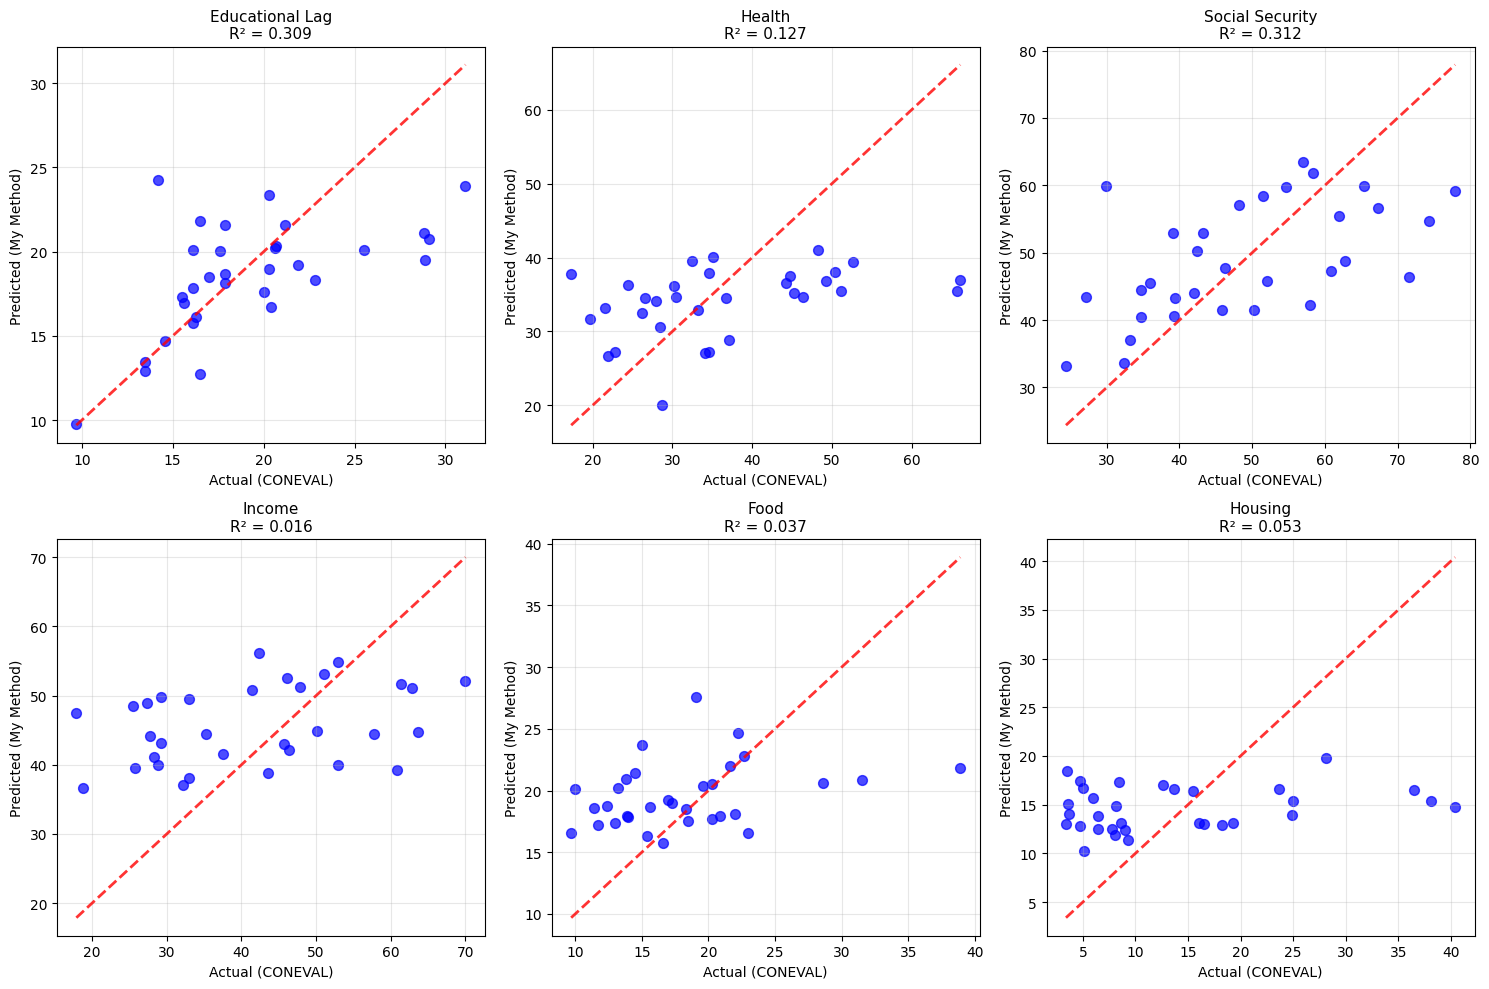

In [49]:
# Save main results
results_df.to_csv('linear_nowcasts/nowcasts_2022.csv', index=False)

# Save metrics
metrics_df = pd.DataFrame.from_dict(prediction_results, orient='index')
metrics_df.to_csv('linear_nowcasts/metrics_2022.csv')

# Create comparison plots
dimensions_to_plot = [dim for dim in dimension_mapping.keys() if f'{dim}_predicted' in results_df.columns]

if len(dimensions_to_plot) > 0:
    n_plots = len(dimensions_to_plot)
    cols = 3
    rows = (n_plots + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    if rows == 1 and n_plots == 1:
        axes = [axes]
    elif rows == 1:
        axes = axes
    else:
        axes = axes.flatten()
    
    for i, dimension in enumerate(dimensions_to_plot):
        ax = axes[i] if n_plots > 1 else axes[0]
        
        actual_col = f'{dimension}_actual'
        pred_col = f'{dimension}_predicted'
        
        if actual_col in results_df.columns and pred_col in results_df.columns:
            x = results_df[actual_col]
            y = results_df[pred_col]
            
            # Scatter plot
            ax.scatter(x, y, alpha=0.7, color='blue', s=50)
            
            # Perfect prediction line
            min_val = min(x.min(), y.min())
            max_val = max(x.max(), y.max())
            ax.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, linewidth=2)
            
            # Calculate R²
            r2 = prediction_results[dimension]['r2']
            
            ax.set_xlabel('Actual (CONEVAL)', fontsize=10)
            ax.set_ylabel('Predicted (My Method)', fontsize=10)
            ax.set_title(f'{dimension.replace("_", " ").title()}\nR² = {r2:.3f}', fontsize=11)
            ax.grid(True, alpha=0.3)
    
    # Hide unused subplots
    for i in range(len(dimensions_to_plot), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.savefig('linear_nowcasts/plots_2022.png', dpi=300, bbox_inches='tight')
    plt.show()

# Alternative method with Partial Least Square.

- feature selection different than before, since for each dimension we consider all components  

- standardize features, choose the optimal number of PLS components using leave-one-out cross-validation

- run `PLSRegression()` on the full dataset to make nowcasts and compute metrics 


In [ ]:
# Map poverty dimensions to target columns
POVERTY_DIMENSIONS = {
    'income': 'income_target',
    'health': 'health_target',
    'education': 'educ_target',
    'social_security': 'social_target',
    'housing': 'housing_target',
    'food': 'food_target'
}

# Get all relevant features for a given dimension
def get_feature_columns(combined_data, dimension):
    feature_cols = []

    prefix_map = {
        'income': 'income',
        'health': 'access_to_health_services',
        'education': 'educational_lag',
        'social_security': 'access_to_social_security',
        'housing': 'housing',
        'food': 'access_to_food',
        'social_cohesion': 'social_cohesion'
    }

    if dimension not in prefix_map:
        print(f"Unknown dimension: {dimension}")
        return []

    base = prefix_map[dimension]

    feature_cols += [col for col in combined_data.columns if col == f'{dimension}_gt']
    feature_cols += [col for col in combined_data.columns if col == f'{base}_avg_sentiment']
    feature_cols += [col for col in combined_data.columns if col == f'{base}_pct_yt']
    feature_cols += [col for col in combined_data.columns if col == f'{base}_pct_tg']

    lda_cols = ['economy', 'women_rights', 'work', 'public_services', 'safety', 'health', 'general_news', 'institutions']
    feature_cols += [col for col in lda_cols if col in combined_data.columns]

    return feature_cols

In [ ]:
# Cross-validation to pick optimal number of components
def optimize_pls_components(X, y, max_components=10):
    max_components = min(max_components, len(X) - 1, X.shape[1])
    scores = []
    for n in range(1, max_components + 1):
        pls = PLSRegression(n_components=n, scale=False)
        mse = -cross_val_score(pls, X, y, cv=LeaveOneOut(), scoring='neg_mean_squared_error').mean()
        scores.append(mse)
    return np.argmin(scores) + 1, scores

In [ ]:
# Train final PLS model
def fit_pls_dimension(combined_data, dimension, target_col):
    print(f"\n=== {dimension.upper()} ===")
    feature_cols = get_feature_columns(combined_data, dimension)

    if not feature_cols:
        print("No features found.")
        return None

    X = combined_data[feature_cols].values
    y = combined_data[target_col].values
    mask = ~(np.isnan(X).any(axis=1) | np.isnan(y))
    X, y = X[mask], y[mask]

    if len(X) < 10:
        print("Too few valid observations.")
        return None

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    optimal_n, _ = optimize_pls_components(X_scaled, y)
    print(f"Optimal components: {optimal_n}")

    pls = PLSRegression(n_components=optimal_n, scale=False)
    pls.fit(X_scaled, y)
    y_pred = pls.predict(X_scaled).flatten()

    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    pearson_r, pearson_p = pearsonr(y, y_pred)
    spearman_r, spearman_p = spearmanr(y, y_pred)

    print(f"R² = {r2:.3f}, RMSE = {rmse:.3f}, Pearson r = {pearson_r:.3f}, Spearman r = {spearman_r:.3f}")

    return {
        'dimension': dimension,
        'model': pls,
        'scaler': scaler,
        'feature_cols': feature_cols,
        'optimal_components': optimal_n,
        'X': X_scaled,
        'y_true': y,
        'y_pred': y_pred,
        'r2': r2,
        'rmse': rmse,
        'pearson_r': pearson_r,
        'spearman_r': spearman_r,
        'states': combined_data.loc[mask, 'state'].values,
        'years': combined_data.loc[mask, 'year'].values}

In [ ]:
# Run PLS on all dimensions
pls_results = {}
for dim, target in POVERTY_DIMENSIONS.items():
    if target in combined_data.columns:
        result = fit_pls_dimension(combined_data, dim, target)
        if result:
            pls_results[dim] = result

In [ ]:
# Plot predictions vs actual
def create_predictions_plot(pls_results):
    if not pls_results:
        return
    cols = 3
    rows = (len(pls_results) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    axes = axes.flatten()

    for i, (dim, res) in enumerate(pls_results.items()):
        ax = axes[i]
        ax.scatter(res['y_true'], res['y_pred'], alpha=0.6)
        ax.plot([res['y_true'].min(), res['y_true'].max()],
                [res['y_true'].min(), res['y_true'].max()], 'r--')
        ax.set_title(f"{dim.capitalize()} (R²={res['r2']:.2f})")
        ax.set_xlabel("True")
        ax.set_ylabel("Predicted")
        ax.grid(True)

    for i in range(len(pls_results), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

In [ ]:
# Validate models on 2022 only
def validate_2022_predictions(combined_data, pls_results):
    data_2022 = combined_data[combined_data['year'] == 2022].copy()
    print(f"\nValidation on 2022 — {len(data_2022)} states")
    results = {}

    for dim, res in pls_results.items():
        print(f"\n--- {dim.upper()} ---")
        model = res['model']
        scaler = res['scaler']
        features = res['feature_cols']
        target = POVERTY_DIMENSIONS.get(dim)

        if target not in data_2022.columns:
            continue

        X = data_2022[features].values
        y = data_2022[target].values
        mask = ~(np.isnan(X).any(axis=1) | np.isnan(y))
        X, y = X[mask], y[mask]
        states = data_2022['state'].values[mask]

        if len(X) == 0:
            continue

        X_scaled = scaler.transform(X)
        y_pred = model.predict(X_scaled).flatten()

        r2 = r2_score(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        mae = np.mean(np.abs(y - y_pred))
        pearson_r, _ = pearsonr(y, y_pred)
        pct_error = np.mean(np.abs((y - y_pred) / y) * 100)

        print(f"R² = {r2:.3f}, RMSE = {rmse:.3f}, MAE = {mae:.3f}, %Error = {pct_error:.1f}%")

        results[dim] = {
            'states': states,
            'y_true': y,
            'y_pred': y_pred,
            'r2': r2,
            'rmse': rmse,
            'mae': mae,
            'mean_pct_error': pct_error,
            'pearson_r': pearson_r}

    return results

In [ ]:
# Save predictions and metrics
def save_comprehensive_results(pls_results, validation_results):
    os.makedirs("pls_nowcasts", exist_ok=True)

    # Save predictions
    preds = {'state': next(iter(validation_results.values()))['states']}
    for dim, res in validation_results.items():
        preds[f'{dim}_actual'] = res['y_true']
        preds[f'{dim}_predicted'] = res['y_pred']
    pd.DataFrame(preds).to_csv("pls_nowcasts/pls_predictions_2022.csv", index=False)

    # Save metrics
    rows = []
    for dim, res in validation_results.items():
        rows.append({
            'dimension': dim,
            'r2': res['r2'],
            'rmse': res['rmse'],
            'mae': res['mae'],
            'mean_pct_error': res['mean_pct_error'],
            'features_used': pls_results[dim]['feature_cols']
        })
    pd.DataFrame(rows).to_csv("pls_nowcasts/pls_metrics_2022.csv", index=False)


=== INCOME ===
Optimal components: 1
R² = 0.228, RMSE = 12.349, Pearson r = 0.478, Spearman r = 0.467

=== HEALTH ===
Optimal components: 1
R² = 0.282, RMSE = 9.462, Pearson r = 0.531, Spearman r = 0.505

=== EDUCATION ===
Optimal components: 1
R² = 0.293, RMSE = 4.260, Pearson r = 0.541, Spearman r = 0.531

=== SOCIAL_SECURITY ===
Optimal components: 10
R² = 0.291, RMSE = 11.670, Pearson r = 0.540, Spearman r = 0.532

=== HOUSING ===
Optimal components: 1
R² = 0.154, RMSE = 9.658, Pearson r = 0.392, Spearman r = 0.424

=== FOOD ===
Optimal components: 1
R² = 0.230, RMSE = 6.159, Pearson r = 0.480, Spearman r = 0.523


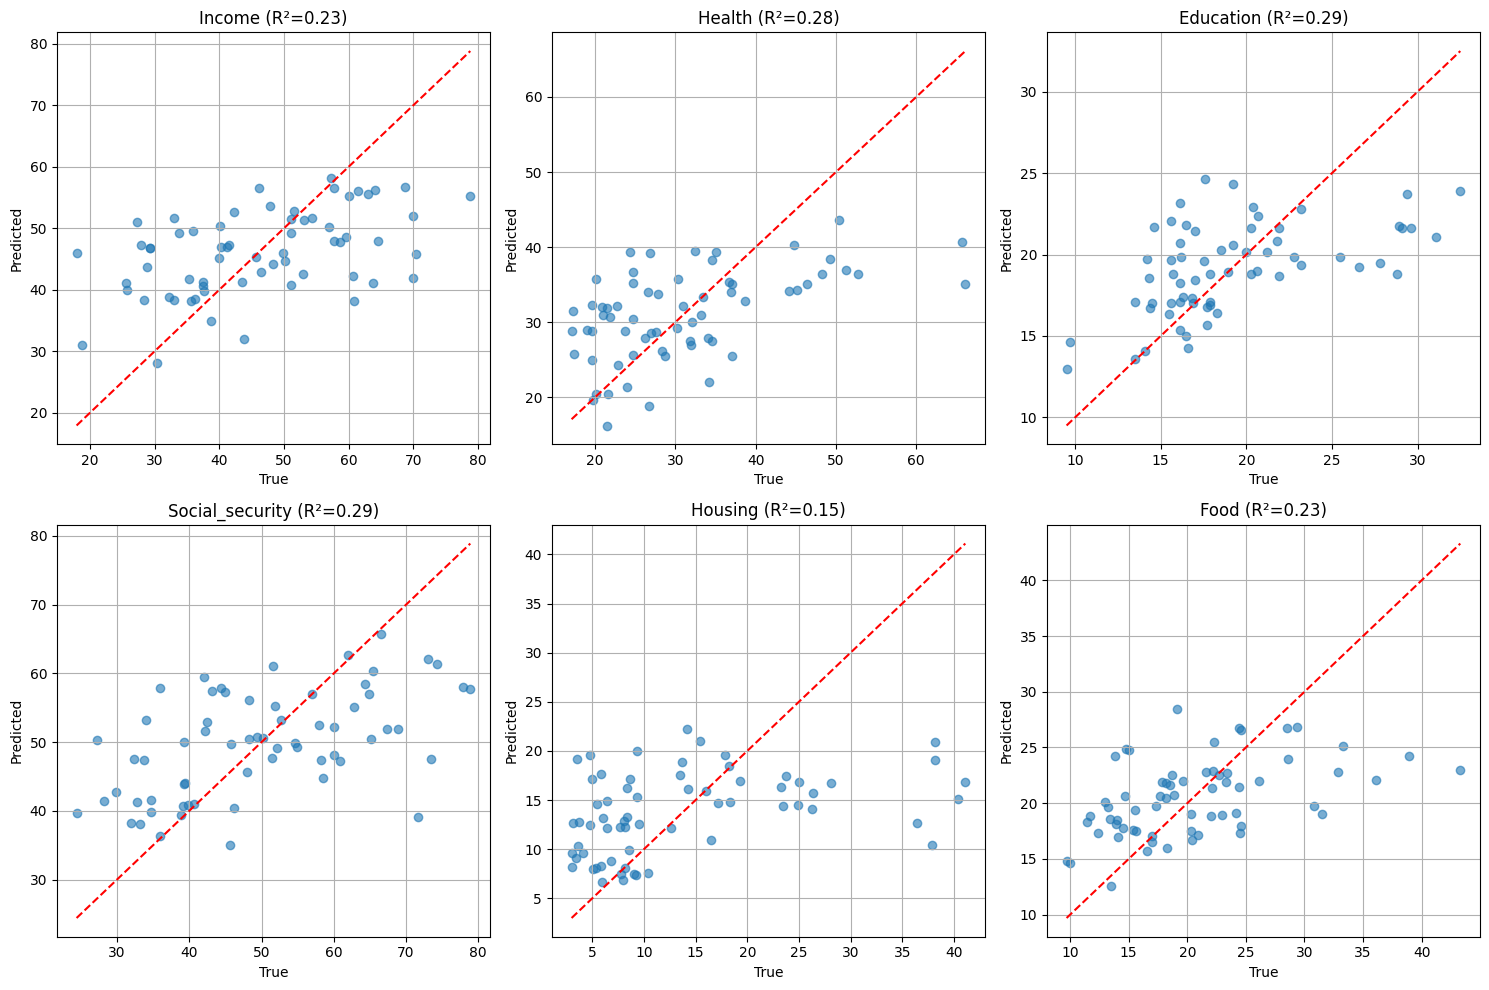


Validation on 2022 — 32 states

--- INCOME ---
R² = 0.084, RMSE = 13.345, MAE = 11.118, %Error = 33.7%

--- HEALTH ---
R² = 0.211, RMSE = 11.045, MAE = 8.865, %Error = 25.5%

--- EDUCATION ---
R² = 0.156, RMSE = 4.567, MAE = 3.567, %Error = 18.8%

--- SOCIAL_SECURITY ---
R² = 0.232, RMSE = 12.343, MAE = 9.776, %Error = 22.6%

--- HOUSING ---
R² = 0.120, RMSE = 9.861, MAE = 7.715, %Error = 92.0%

--- FOOD ---
R² = 0.119, RMSE = 5.820, MAE = 4.641, %Error = 28.2%

All results saved.


In [ ]:
# Run everything
if pls_results:
    create_predictions_plot(pls_results)
    validation_2022 = validate_2022_predictions(combined_data, pls_results)
    if validation_2022:
        save_comprehensive_results(pls_results, validation_2022)
        print("\nAll results saved.")
else:
    print("No PLS models were fitted.")
